# Credit card Fraud detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

### Goal : Classify whether it is a fraud transaction or not.

**The following steps will be taken: **
 1. EDA
 2. fit logistic regression with all features given
 3. analyze the result
 4. resampling to fix skewness in dataset
 5. compare two results and conclusion

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


# Loading the data

In [2]:
df = pd.read_csv('../Downloads/creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# It is true that in data description, all variables are the result of PCA transformation
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore to Data

In [4]:
# checking null value in dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# number of label "1" in whole dataset.
sum(df['Class']==1)

492

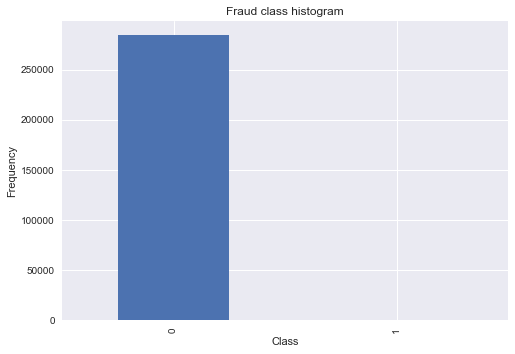

In [6]:
# visualize
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
492/284807 * 100

0.1727485630620034

The dataset obviously skewed.

consist of 0.17% fraudulent transaction in dataset. 

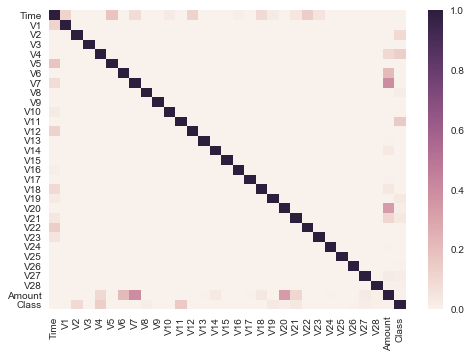

In [8]:
# plot correlation heatmap 
corr = df.corr()
sns.heatmap(corr, vmin=0, vmax=1)

'Time' column is about the time when each transaction occured.
As you can see in correlation between data, I couldn't find any significant clue.

In [9]:
# make data frame easy to see, change order of columns and drop Time column.
col = df.columns.values
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class']

# assign new column order to data frame
df = df.reindex(columns=col)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


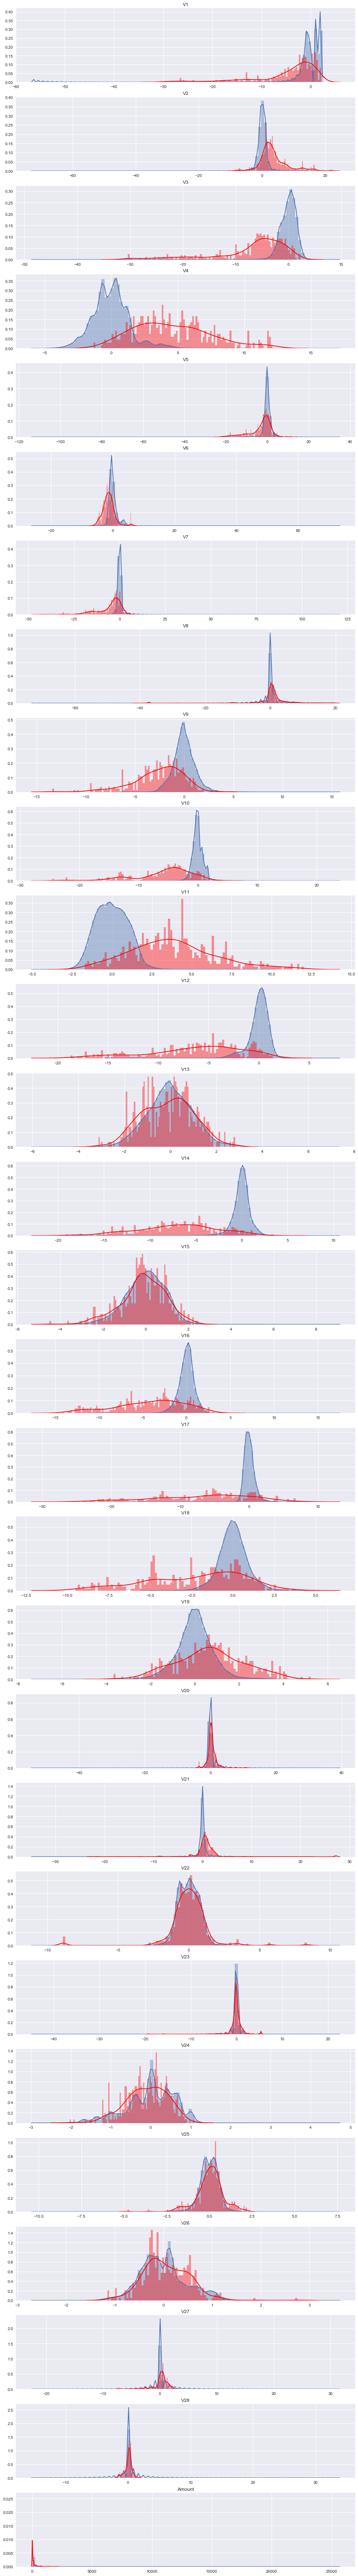

In [10]:
# plot histogram for all variables
import matplotlib.gridspec as gridspec

features = df.iloc[:,:29].columns
plt.figure(figsize=(15,30*4))
gs = gridspec.GridSpec(30, 1)
for i, col in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class==0], bins=100)
    sns.distplot(df[col][df.Class==1], bins=100, color='r')
    ax.set_xlabel('')
    ax.set_title(col)
plt.show()

most of data distributed centered around 0.

**note**
df.hist() plots histogram for all data but column order isn't preserved unless you change name of column.

#### I wonder how standardization affect logistic regression result. Do I have to standardize features everytime? no exception?

To figure out I will test 2 cases ->
 * Test1 : fit logistic regression with NOT Standardized 'Amount' feature.
 * Test2 : fit logistic regression with Standardized 'Amount' feature.

## Test 1

In [11]:
# copy data frame for testing
df_test = df
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
X = df_test.loc[:, df_test.columns != 'Class']
y = df_test.loc[:, df_test.columns == 'Class']

In [13]:
# divide data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# choose Logistic regression to classify whether it is fraudulent transaction or not.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)

In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=15)
    plt.yticks(tick_marks, classes, rotation=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    
        #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

        Confusion matrix not standardized


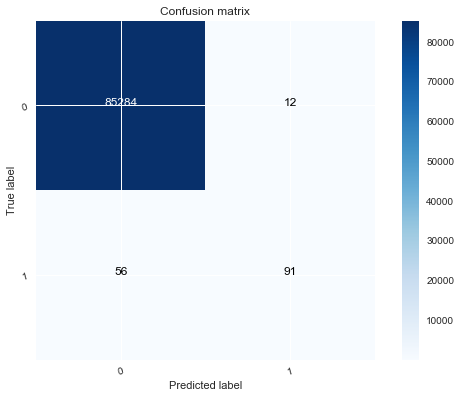

In [15]:
# Compute confusion matrix
class_set = [0, 1]
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
np.set_printoptions(precision=2)
print ("        Confusion matrix not standardized")

# Plot non-standardized confusion matrix
plot_confusion_matrix(cm=cnf_matrix, classes=class_set)
plt.show()

In [16]:
# calculate Precision, Recall and F1-score.

# Precision rate = TP / TP + FP
# Recall rate = TP / TP + FN

precision = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1])
recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])

print ("Not standardized\n")
print ("------------------------------------------------------------------------")
print ("Precision : %.4f" %precision)
print ("------------------------------------------------------------------------")
print ("Recall : %.4f" %recall)
print ("------------------------------------------------------------------------")
print ("F1-Score : %.4f" % ((precision*recall*2)/(precision+recall)))

Not standardized

------------------------------------------------------------------------
Precision : 0.8835
------------------------------------------------------------------------
Recall : 0.6190
------------------------------------------------------------------------
F1-Score : 0.7280


## Test 2

In [17]:
# standardize
from sklearn.preprocessing import StandardScaler

df_test['Amount_rescale'] = StandardScaler().fit_transform(df_test['Amount'].values.reshape(-1, 1))
df_test.drop('Amount', axis=1, inplace=True)
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_rescale
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
X_std = df_test.loc[:, df_test.columns != 'Class']
y_std = df_test.loc[:, df_test.columns == 'Class']

In [19]:
# divide data
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.3, random_state=0)

# train and predict
lr_std = LogisticRegression()
lr_std.fit(X_train_std, y_train_std.values.ravel())
y_pred_std = lr_std.predict(X_test_std)

        Confusion matrix standardized


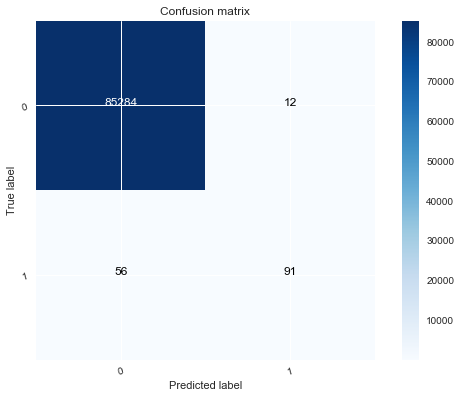

In [20]:
# Compute confusion matrix
cnf_matrix_std = confusion_matrix(y_true=y_test_std, y_pred=y_pred_std)
np.set_printoptions(precision=2)
print ("        Confusion matrix standardized")

# Plot standardized confusion matrix
plot_confusion_matrix(cm=cnf_matrix_std, classes=class_set)
plt.show()

In [21]:
# calculate Precision, Recall and F1-score.
# overwrite variables
precision = cnf_matrix_std[1,1] / (cnf_matrix_std[1,1] + cnf_matrix_std[0,1])
recall = cnf_matrix_std[1,1] / (cnf_matrix_std[1,1] + cnf_matrix_std[1,0])

print ("Standardized\n")
print ("------------------------------------------------------------------------")
print ("Precision : %.4f" %precision)
print ("------------------------------------------------------------------------")
print ("Recall : %.4f" %recall)
print ("------------------------------------------------------------------------")
print ("F1-Score : %.4f" % ((precision*recall*2)/(precision+recall)))

Standardized

------------------------------------------------------------------------
Precision : 0.8835
------------------------------------------------------------------------
Recall : 0.6190
------------------------------------------------------------------------
F1-Score : 0.7280


#### I don't see any difference between test1 result and test2 result.

#### but standardization is important for regularization to work properly, we need to ensure that all our features are on comparable scales.
so I will standardize feature.

In [22]:
df = df_test

# Handle skewed data

we can not collect more data, so we should solve skewed data problem by Oversampling/Undersampling.

Let's try undersampling. Main idea of undersampling is drop some of labeled samples at random to give a balanced dataset of 50% sample. we have 492 of fraudulent transactions. to make 50 / 50 ratio, choose normal transactions randomly and then concatenate 492 of fraudulent transactions and 492 of normal transactions.

In [23]:
# get fraudulent transaction indices
len_fraud = len(df[df['Class']==1])
indices_fraud = np.array(df[df['Class']==1].index)

# get normal transaction indices
indices_normal = np.array(df[df['Class']==0].index)
indices_normal = np.random.choice(indices_normal, len_fraud, replace=False)

# make a undersampled dataframe
undersample_indices = np.concatenate([indices_normal, indices_fraud])
under_df = df.iloc[undersample_indices, :]

# reindexing
under_df.index = range(0, 984)
under_df.shape

(984, 30)

fit undersampled data to logistic regression model

In [24]:
# shuffle rows in dataframe
under_df = under_df.sample(frac=1).reset_index(drop=True)

In [25]:
# divide data
under_X = under_df.loc[:, under_df.columns.values != 'Class']
under_y = under_df.loc[:, under_df.columns.values == 'Class']

In [26]:
X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(under_X, under_y, test_size=0.3, random_state=0)

lr_und = LogisticRegression()
lr_und.fit(X_train_und, y_train_und.values.ravel())
y_pred_und = lr_und.predict(X_test_und)

Confusion matrix undersampled


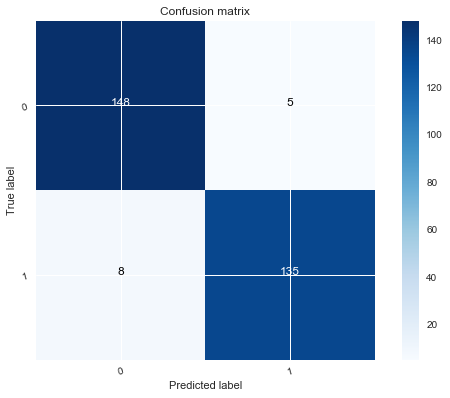

In [27]:
cnf_matrix_und = confusion_matrix(y_true=y_test_und, y_pred=y_pred_und)
np.set_printoptions(precision=2)
print ("Confusion matrix undersampled")

plot_confusion_matrix(cm=cnf_matrix_und, classes=class_set)
plt.show()

In [28]:
# calculate Precision, Recall and F1-score.
# overwrite variables
precision = cnf_matrix_und[1,1] / (cnf_matrix_und[1,1] + cnf_matrix_und[0,1])
recall = cnf_matrix_und[1,1] / (cnf_matrix_und[1,1] + cnf_matrix_und[1,0])


print ("Undersampled\n")
print ("------------------------------------------------------------------------")
print ("Precision : %.4f" %precision)
print ("------------------------------------------------------------------------")
print ("Recall : %.4f" %recall)
print ("------------------------------------------------------------------------")
print ("F1-Score : %.4f" % ((precision*recall*2)/(precision+recall)))

Undersampled

------------------------------------------------------------------------
Precision : 0.9643
------------------------------------------------------------------------
Recall : 0.9441
------------------------------------------------------------------------
F1-Score : 0.9541


#### test whole dataset with the model that we've fitted undersampled dataset.

In [29]:
# to test whole dataset, reset X and y
X = df.loc[:, df.columns.values != 'Class']
y = df.loc[:, df.columns.values == 'Class']

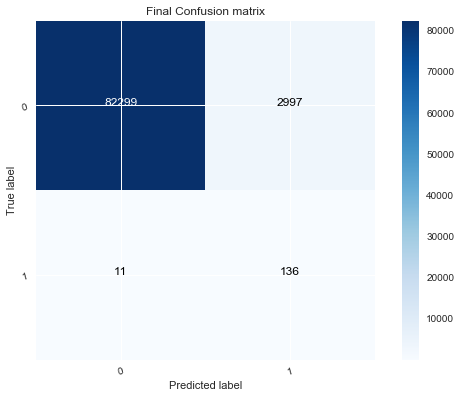

In [30]:
# first fit model, compute confusion matrix and then plot ROC, AUC curve
from sklearn.metrics import roc_curve, auc

# the model we will use is 'lr_und'
# train with undersampled data
lr_und = LogisticRegression()
lr_und.fit(X_train_und, y_train_und.values.ravel())

# test whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
y_pred = lr_und.predict(X_test)

#compute confusion matrix
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_set, title='Final Confusion matrix')
plt.show()


In [31]:
# calculate Precision, Recall and F1-score.
# overwrite variables
precision = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1])
recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])


print ("Undersampled\n")
print ("------------------------------------------------------------------------")
print ("Precision : %.4f" %precision)
print ("------------------------------------------------------------------------")
print ("Recall : %.4f" %recall)
print ("------------------------------------------------------------------------")
print ("F1-Score : %.4f" % ((precision*recall*2)/(precision+recall)))

Undersampled

------------------------------------------------------------------------
Precision : 0.0434
------------------------------------------------------------------------
Recall : 0.9252
------------------------------------------------------------------------
F1-Score : 0.0829


very low Precision rate.

## Comapre two ROC, AUC result

plot ROC, AUC of whole dataset first

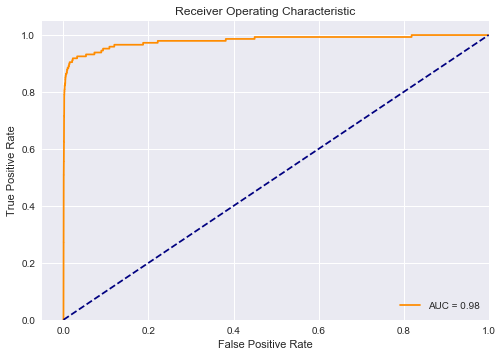

In [32]:
# plot ROC, AUC
# below code is use undersampled model and plot whole dataset.
y_pred_score = lr_und.fit(X_train_und, y_train_und.values.ravel()).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_score)
roc_auc = auc(fpr, tpr)

# plot
plt.plot(fpr, tpr, 'darkorange', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'--', color='navy')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


now plot ROC, AUC of udersampled dataset

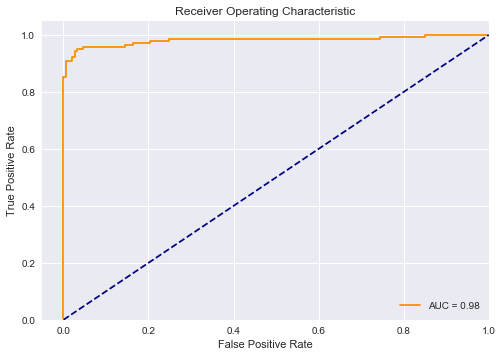

In [33]:
# plot ROC, AUC
# below code is use undersampled model and plot whole dataset.
y_pred_score_und = lr_und.fit(X_train_und, y_train_und.values.ravel()).decision_function(X_test_und)

fpr_und, tpr_und, thresholds_und = roc_curve(y_test_und.values.ravel(), y_pred_score_und)
roc_auc_und = auc(fpr_und, tpr_und)

# plot
plt.plot(fpr_und, tpr_und, 'darkorange', label='AUC = %.2f'% roc_auc_und)
plt.plot([0,1],[0,1],'--', color='navy')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


## K-fold

use K-fold cross validation to find best parameter C.

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import recall_score

In [35]:
under_X = under_df.loc[:, under_df.columns.values != 'Class']
under_y = under_df.loc[:, under_df.columns.values == 'Class']

In [36]:
kf = KFold(n_splits=7)
c_params = [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]
results = []

for c_param in c_params:
    print ('--------------------------------------------------')
    print 'C parameter: ', c_param
    print ('--------------------------------------------------')
    print ('')
    
    recall_accs = []
    
    for k, (train, test) in enumerate(kf.split(under_X, under_y)):
        # use L2 penalization
        lr_kf = LogisticRegression(C = c_param, penalty='l2')
        lr_kf.fit(under_X.iloc[train], under_y.iloc[train].values.ravel())
        y_pred_under = lr_kf.predict(under_X.iloc[test].values)
        
        # compute Recall rate because our goal is find fraudulent transactions. We should minimize TN which missclassify 
        # transactions which are actually fraudulent transaction but predict as normal transaction.    
        recall_acc = recall_score(under_y.iloc[test].values.ravel(), y_pred_under)
        recall_accs.append(recall_acc)
        print 'Iteration: ',k+1 ,'recall score = ', recall_acc
    
     # The mean value of those recall scores is the metric we want to save and get hold of.
    results.append(np.mean(recall_accs))
    
    print ('')
    print 'Mean recall score ', np.mean(recall_accs)
    print ('')
    
    best_c = max(results)
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    
    print 'Best mean recall score is', best_c
    print ('')


--------------------------------------------------
C parameter:  0.001
--------------------------------------------------

Iteration:  1 recall score =  0.955223880597
Iteration:  2 recall score =  0.957746478873
Iteration:  3 recall score =  0.918032786885
Iteration:  4 recall score =  0.953846153846
Iteration:  5 recall score =  0.946666666667
Iteration:  6 recall score =  0.917808219178
Iteration:  7 recall score =  0.9625

Mean recall score  0.944546312292

Best mean recall score is 0.944546312292

--------------------------------------------------
C parameter:  0.01
--------------------------------------------------

Iteration:  1 recall score =  0.89552238806
Iteration:  2 recall score =  0.957746478873
Iteration:  3 recall score =  0.852459016393
Iteration:  4 recall score =  0.938461538462
Iteration:  5 recall score =  0.933333333333
Iteration:  6 recall score =  0.904109589041
Iteration:  7 recall score =  0.9125

Mean recall score  0.913447477737

Best mean recall score is 0.

In [37]:
print zip(c_params, results)

[(0.001, 0.9445463122923432), (0.01, 0.9134474777374787), (0.1, 0.90573579669230375), (1, 0.91206123355052726), (10.0, 0.91164914563843946), (100.0, 0.90963707320383169), (1000.0, 0.91164914563843946)]


best C parameter is 0.001

### Let's fit model again with best C parameter 0.001 and see what will change.

In [38]:
X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(under_X, under_y, test_size=0.3, random_state=0)

lr_c = LogisticRegression(C=best_c)
lr_c.fit(X_train_und, y_train_und.values.ravel())
y_pred_c = lr_c.predict(X_test_und)

Confusion matrix with best C parameter


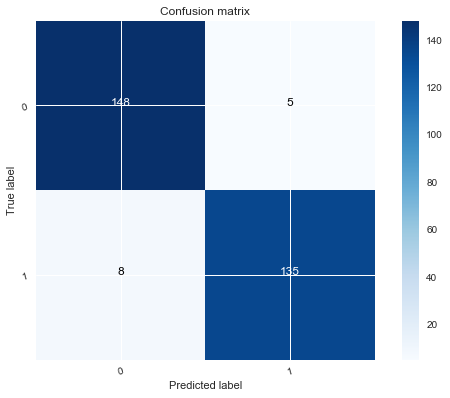

In [39]:
cnf_matrix_c = confusion_matrix(y_true=y_test_und, y_pred=y_pred_c)
np.set_printoptions(precision=2)
print ("Confusion matrix with best C parameter")

plot_confusion_matrix(cm=cnf_matrix_c, classes=class_set)
plt.show()

In [41]:
precision = cnf_matrix_c[1,1] / (cnf_matrix_c[1,1] + cnf_matrix_c[0,1])
recall = cnf_matrix_c[1,1] / (cnf_matrix_c[1,1] + cnf_matrix_c[1,0])


print ("result fit model with best C")
print ("------------------------------------------------------------------------")
print ("Precision : %.4f" %precision)
print ("------------------------------------------------------------------------")
print ("Recall : %.4f" %recall)
print ("------------------------------------------------------------------------")
print ("F1-Score : %.4f" % ((precision*recall*2)/(precision+recall)))

result fit model with best C
------------------------------------------------------------------------
Precision : 0.9643
------------------------------------------------------------------------
Recall : 0.9441
------------------------------------------------------------------------
F1-Score : 0.9541
